# **Descripción de la Tarea**  
Se dispone de un conjunto de datos proporcionado por una empresa, que contiene información sobre inversiones y ventas desde 1980 hasta 2017. A partir de estos datos, se llevará a cabo un análisis detallado para extraer información relevante.  

## **Objetivos**  

1. **Construcción de un modelo de regresión lineal**  
   - Calcular los parámetros del modelo y analizar su significado.  

2. **Estimación de ventas**  
   - Determinar la cantidad de ventas proyectadas si la inversión asciende a 7 millones de euros.  

3. **Validación del modelo**  
   - Evaluar la precisión del modelo utilizando la **Suma de Cuadrados del Error (SCE)** y el **coeficiente de determinación**.  

4. **Análisis e interpretación**  
   - Explicar y justificar los resultados obtenidos en cada etapa del análisis.  


# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
import pandas.testing as tm
%matplotlib inline

<ipython-input-1-d328ecb99472>:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


# Carga de datos y visualización general

In [2]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualicemos los primeros 10 registros del dataset

In [3]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


### Veamos la estructura de nuestro dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


### Analisis global de datos estadisticos de la muestra de variables cuantitativas

In [6]:
df.describe(include ='float64')

,Inversion,Ventas
count,38.000000,38.000000
mean,10.250000,10.492895
std,5.556528,4.315321
min,1.000000,0.620000
25%,5.625000,7.565000
50%,10.250000,11.080000
75%,14.875000,14.032500
max,19.500000,17.450000


### Cálculo de la mediana

In [7]:
print("La mediana de la variable Inversion es:", df["Inversion"].median())
print("La mediana de la variable Venta es:", df["Ventas"].median())
# Cálculo de la moda
print("Las modas de la variable Inversion son:", df["Inversion"].mode().to_numpy())
print("Las modas de la variable Ventas son:", df["Ventas"].mode().to_numpy())

La mediana de la variable Inversion es: 10.25
La mediana de la variable Venta es: 11.079999999999998
Las modas de la variable Inversion son: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
Las modas de la variable Ventas son: [ 0.62  0.64  4.61  5.09  5.18  5.44  6.39  7.04  7.13  7.48  7.82  8.01
  8.22  8.86  9.1   9.78  9.82 10.05 11.04 11.12 11.44 11.47 12.01 12.33
 12.53 12.56 13.4  13.83 14.1  14.64 14.95 15.04 15.06 15.69 15.86 16.21
 16.72 17.45]


## Gráficas de dispersión

Text(0.5, 1.0, 'Distribución de Inversión verus Ventas')

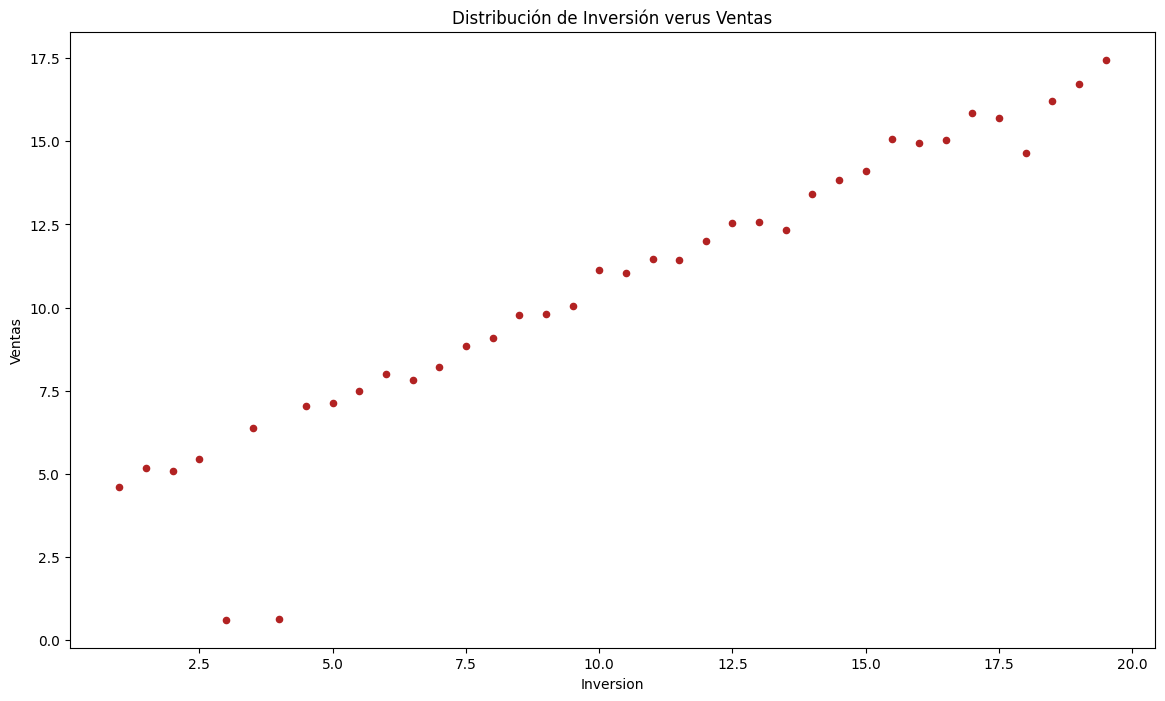

In [8]:
fig, ax = plt.subplots(figsize=(14,8))

df.plot(
    x = 'Inversion',
    y = 'Ventas',
    c= 'firebrick',
    kind = 'scatter',
    ax = ax
)
ax.set_title('Distribución de Inversión verus Ventas')

## Valores atípicos

Analicemos ambas variables para determinar sus varlores atipicos:

In [9]:
print("Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR Variable Ventas")
Q1_ventas = df["Ventas"].quantile(0.25)
Q3_ventas = df["Ventas"].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas

print("Primer cuartil:", Q1_ventas)
print("Tercer cuartil:", Q3_ventas)
print("Rango intercuartílico", IQR_ventas)

print("\n\nCalculo de primer cuartil, tercer cuartil y ranco intercuartílico (IQR) variable Inversión")
Q1_inversion = df["Inversion"].quantile(0.25)
Q3_inversion = df["Inversion"].quantile(0.75)
IQR_inversion = Q3_inversion - Q1_inversion

print("Primer cuartil:", Q1_inversion)
print("Tercer cuartil:",  Q3_inversion)
print("Rango intercuartílico:", IQR_inversion)

Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR Variable Ventas
Primer cuartil: 7.565
Tercer cuartil: 14.032499999999999
Rango intercuartílico 6.4674999999999985


Calculo de primer cuartil, tercer cuartil y ranco intercuartílico (IQR) variable Inversión
Primer cuartil: 5.625
Tercer cuartil: 14.875
Rango intercuartílico: 9.25


<ipython-input-10-c54c83932bf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"], palette="Set2")


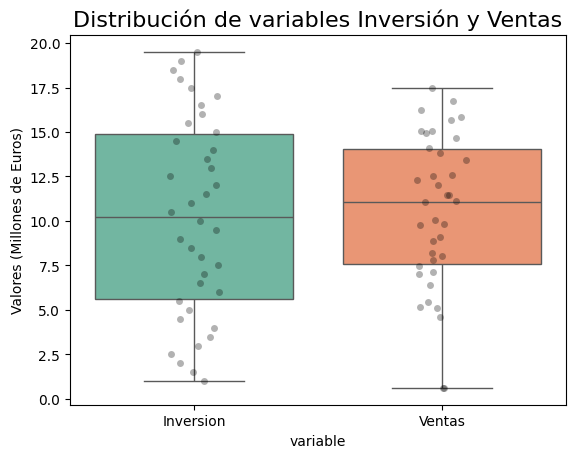

In [10]:
df2 = pd.DataFrame(data=df, columns=["Inversion", "Ventas"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"], palette="Set2")
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df2), marker="o", alpha=0.3, color="black", order=["Inversion", "Ventas"])
boxplot.axes.set_title("Distribución de variables Inversión y Ventas", fontsize=16)
boxplot.set_ylabel("Valores (Millones de Euros)", fontsize=10)
plt.show()

la inversión presenta una variabilidad significativamente mayor en comparación con las ventas, lo cual se evidencia en un rango intercuartílico más amplio.

Tanto en la inversión como en las ventas, se identifican valores atípicos que se desvían de la distribución general. Estos valores extremos podrían representar casos excepcionales de inversiones o ventas, ya sea por su magnitud elevada o reducida.

La inversión muestra una mayor amplitud en sus valores, mientras que las ventas exhiben una menor variabilidad. Esto sugiere que, a pesar de las fluctuaciones en los montos invertidos, los resultados de ventas tienden a mantenerse dentro de un rango más estable y predecible.

In [13]:
#Por outlier entendemos valores superiores a la suma del tercer cuartil más 1.5 veces el IQR, o inferiores al primer cuartil menos 1.5 veces el IQR

In [17]:
limite_superior_ventas = Q3_ventas + 1.5 * IQR_ventas
limite_inferior_ventas = Q1_ventas - 1.5 * IQR_ventas

limite_superior_inversion = Q3_inversion + 1.5 * IQR_inversion
limite_inferior_inversion = Q1_inversion - 1.5 * IQR_inversion

In [18]:
outliers_ventas = df[(df["Ventas"] > limite_superior_ventas) | (df["Ventas"] < limite_inferior_ventas)]
outliers_inversion = df[(df["Inversion"] > limite_superior_inversion) | (df["Inversion"] < limite_inferior_inversion)]

In [19]:
print("Outliers en Ventas:\n", outliers_ventas)
print("\nOutliers en Inversión:\n", outliers_inversion)

Outliers en Ventas:
 Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []

Outliers en Inversión:
 Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []


### Análisis entre variables Inversión y Ventas

In [20]:
# piens en la covarianza

In [21]:
covarianza = np.cov(df['Inversion'], df['Ventas'])[0, 1]
print(f"La covarianza entre Inversión y Ventas es:{covarianza}")

La covarianza entre Inversión y Ventas es:22.92993243243243


Existe una correlación positiva entre la inversión y las ventas. Esto implica que un aumento en la inversión generalmente se traduce en un incremento en las ventas, y viceversa.

In [22]:
correlacion = pearsonr(df['Inversion'], df['Ventas'])[0]
print(f"La correlación entre Inversión y Ventas es: {correlacion}")

La correlación entre Inversión y Ventas es: 0.9562823420491504


Un valor de 0.956 revela que la inversión y las ventas están altamente correlacionadas de manera positiva. Esto respalda la conclusión obtenida del análisis de covarianza, donde se constató que el aumento de la inversión se asocia con un incremento en las ventas. La proximidad de la correlación a 1 demuestra una relación lineal muy marcada

## Ajuste del modelo utilizando scipy

In [ ]:
## Ajuste del modelo utilizando statsmodels

In [23]:
X = sm.add_constant(df['Inversion'])

In [25]:
modelo = sm.OLS(df['Ventas'], X)  # OLS: Ordinary Least Squares
resultados = modelo.fit()

In [26]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           8.25e-21
Time:                        23:54:36   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8805      0.440      6.546      0.0

El R² de 0.914 indica que la inversión explica un significativo 91.4% de las variaciones en las ventas. Esto sugiere una fuerte conexión entre ambas variables.

El R² ajustado de 0.912, muy cercano al R², refuerza la idea de que el modelo se ajusta bien a los datos observados.

El estadístico F de 384.9, junto con un p-valor de 8.25e-21 (muy inferior a 0.05), demuestra que el modelo es estadísticamente significativo. Esto significa que la relación observada entre inversión y ventas no es producto del azar.

El valor de la constante (const) indica que, incluso sin inversión, se espera un nivel de ventas aproximado de 2.88 millones de euros.

El coeficiente de inversión (0.7427) señala que, por cada millón de euros adicional invertido, se espera un aumento de aproximadamente 0.7427 millones de euros en las ventas.

## Escribe tus conclusiones finales

El modelo estadístico confirma una relación sólida y positiva entre la inversión y las ventas, con un alto poder explicativo (R² de 91.4%). Los coeficientes son estadísticamente significativos, lo que indica que la relación no es casual.

Por cada millón de euros invertido, se espera un aumento de aproximadamente 742,700 euros en las ventas. Esta relación directa y positiva sugiere que la inversión es un motor clave para el crecimiento de las ventas.

Se recomienda mantener o aumentar la inversión en áreas estratégicas como marketing, digitalización y mejora del producto o servicio. Además, es crucial monitorear constantemente los resultados y ajustar la estrategia de inversión para optimizar el retorno y evitar gastos innecesarios.